# Creating Figure 4.7a for Thesis

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

    
prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)

file = '10000sims_17params_11_04_nsf_fake_ratio'
#file = '10000sims_17params_30_04_nsf_fake'


os.chdir('results')


posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))

In [7]:
#posterior = posteriors_round[1]

In [8]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


In [9]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [10]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size  17param size17
early stop  17param size
early stop
early stop  param size17
early stop 200.0
 param size 200.0 
17param size 
  200.017param size 200.0
param sizeparam size1717

param size param size 
 
early stop 17

17 early stop17 
200.0
 
 param size 200.0early stop 17 200.0
17param size 
param size 
 17early stop
 17 
200.0num_params
param size num_params  17 17

17
num_params num_paramsjoblib will run over 1 jobsjoblib will run over 1 jobsnum_params
 17
 1717


joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
num_params 17
joblib will run over 1 jobsnum_params
num_params  1717

joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.3272271  12.28500384
 12.24284787]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.7min
obs [-0.59760178 -0.59840714 -0.59920666 ... 17.33900614 17.27901994
 17.21901658]
param size 17
early stop 200.0
param size  17
obs [-0.59760178 -0.59840714 -0.59920666 ... 14.78470389 14.73177021
 14.67885047]
param size 17
early stop 200.0
param size num_params  1717

joblib will run over 1 jobs
num_params 17[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min

joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1

Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 20.0 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulati

Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation tim

Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...Simulation time: 130.0 ms...

Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.44384056  9.41235545
  9.38089707]
param size 17
early stop 200.0
param size  17
n

Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...Simulation time: 160.0 ms...

Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...Simulation time: 170.0 ms...

obs [-0.59760178 -0.59840714 -0.59920666 ... 11.5256432  11.48768478
 11.44972387]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  9.9min
num_params 17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
obs [-0.59378646 -0.59428651 -0.5947769  ... 15.51639078 15.46368245
 15.41097437]
param size 17
earl

Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
obs [-0.59711465 -0.59790754 -0.59870084 ... 13.84019125 13.79769045
 13.75516382]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 11.7min
obs [-0.59760178 -0.59840714 -0.59920666 ... 16.82390961 16.76255752
 16.70127798]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.8min
Building the NEURON model
Building the NEURON model
Simulation time: 40.0 ms...
obs [-0.59502861 -0.59622837 -0.59742797 ... 23.81319036 23.73329521
 23.65346081]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 11.8min
joblib will run o

num_params 17
joblib will run over 1 jobs
Simulation time: 10.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 50.0 ms...
obs [-0.59747668 -0.59826226 -0.5990403  ... 16.14989405 16.09764591
 16.0454538 ]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 14.4min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Si

Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...Simulation time: 80.0 ms...

Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation tim

Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 60.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 15.10825077 15.05636609
 15.00452655]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 23.3min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms..

Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
obs [-0.59757736 -0.59837501 -0.59916547 ... 14.55422081 14.50144446
 14.44872722]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on

In [11]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [11]:
    
#s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

s_x_prior = torch.load('s_x_prior.pt')

In [12]:
s_x_torch = torch.stack(([s_x[i] for i in range(39)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(39)]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [13]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

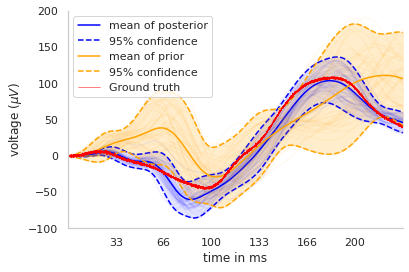

In [14]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')
sns.set_context('notebook')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x[0:40]:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior[0:40]:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, label='Ground truth', color='red', linewidth=0.5)

plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])


sns.despine()

plt.legend()

In [16]:
plt.savefig('thesis_4_7a.png')

<Figure size 432x288 with 0 Axes>